pappus points:
1/3 2/3
5/3 4/3
3/5 4/5
   collinear:  True


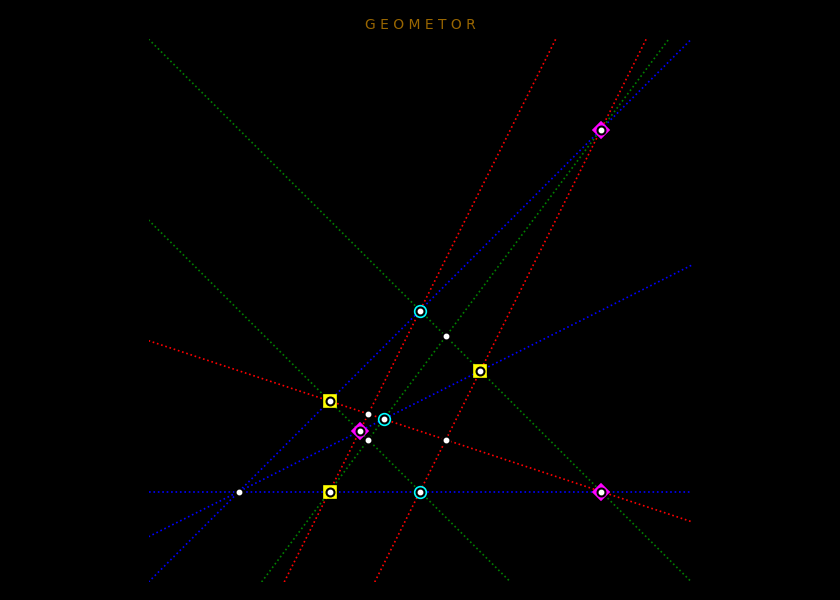

In [1]:
%run run.py
%matplotlib widget

blues = []
reds = []
greens = []

squares = []
circles = []
diamonds = []

pappus_points = []

A = []

A.append( add_point(point(0, 0, classes=['square'])) )
squares.append(A[-1])

A.append( add_point(point(1, 0, classes=['circle'])) )
circles.append(A[-1])

line_a = line(A[0], A[1], classes=['blue']) 
add_element(line_a)
blues.append(line_a)

# manually set for now
# A3 = point(sp.Rational(4, 2), 0)
A.append( add_point( point(3, 0, classes=['diamond']) ) )
diamonds.append(A[-1])



B = []

B.append( add_point( point(0, 1, classes=['square']) ) )
squares.append(B[-1])

B.append( add_point( point(1, 2, classes=['circle']) ) )
circles.append(B[-1])

line_b = line(B[0], B[1], classes=['blue']) 
blues.append(line_b)
add_element(line_b)

#TODO: set point by function
B.append( add_point( point(3, 4, classes=['diamond']) ) )
diamonds.append(B[-1])


j1 = line(A[0], B[1], classes=['red'])
reds.append(add_element(j1))
j2 = line(A[1], B[0], classes=['green'])
greens.append(add_element(j2))

# TODO:: check for parallel
meet = j1.intersection(j2)
pt = pts[pts.index(meet[0])]
diamonds.append(pt)
pappus_points.append(pt)

j1 = line(A[1], B[2], classes=['red'])
reds.append(j1)
j2 = line(A[2], B[1], classes=['green'])
greens.append(j2)
# TODO:: check for parallel
add_element(j1)
add_element(j2)
meet = j1.intersection(j2)
pt = pts[pts.index(meet[0])]
squares.append(pt)
pappus_points.append(pt)

j1 = line(A[0], B[2], classes=['green'])
greens.append(j1)
j2 = line(A[2], B[0], classes=['red'])
reds.append(j2)
add_element(j1)
add_element(j2)
# TODO:: check for parallel
meet = j1.intersection(j2)
pt = pts[pts.index(meet[0])]
circles.append(pt)
pappus_points.append(pt)

pappus_line = line(pappus_points[0], pappus_points[1])
blues.append(pappus_line)
add_element(pappus_line)


limx, limy = get_limits_from_points(pts)
bounds = set_bounds(limx, limy)

plt_init(limx, limy)

classes = {}
classes['blues'] = {'color':'b', 'linestyle':':'}

for line in blues:
    plot_line(line, bounds, color='b', linestyle=':')
    
for line in reds:
    plot_line(line, bounds, color='r', linestyle=':')
    
for line in greens:
    plot_line(line, bounds, color='g', linestyle=':')

classes['circle'] = {'under_color':'#0FF', 'under_markersize':7, 'under_marker':'o'}
classes['square'] = {'under_color':'#FF0', 'under_markersize':7, 'under_marker':'s'}
classes['diamond'] = {'under_color':'#F0F', 'under_markersize':7, 'under_marker':'D'}

plot_points(circles, **classes['circle'], add_to_cursors=False)
plot_points(squares, **classes['square'], add_to_cursors=False)
plot_points(diamonds, **classes['diamond'], add_to_cursors=False)
plot_points(pts)

print(f'pappus points:')
for pt in pappus_points:
    print(pt.x, pt.y)
    
print('   collinear: ', sp.Point.is_collinear(*pappus_points))



In [2]:
for pt in pts:
    print(pt.x, pt.y, pt.classes)

0 0 ['square']
1 0 ['circle']
3 0 ['diamond']
0 1 ['square']
1 2 ['circle']
-1 0 []
3 4 ['diamond']
1/3 2/3 []
5/3 4/3 []
3/7 4/7 []
9/7 12/7 []
3/7 6/7 []
9/7 4/7 []
3/5 4/5 []


In [2]:
triangle_sq = polygon(squares)
plot_polygon(triangle_sq, color='#FF03')

triangle_cir = polygon(circles)
plot_polygon(triangle_cir, color='#0FF3')

triangle_dia = polygon(diamonds)
plot_polygon(triangle_dia, color='#F0F3')

In [3]:
print('points: ', len(pts))
for pt in pts:
    print(f'{str(pt.x): >8} {str(pt.y): >8}')

points:  14
       0        0
       1        0
       3        0
       0        1
       1        2
      -1        0
       3        4
     1/3      2/3
     5/3      4/3
     3/7      4/7
     9/7     12/7
     3/7      6/7
     9/7      4/7
     3/5      4/5


In [4]:
def spread(l1, l2):
    '''calculate the spread '''
    a1, a2, a3 = l1.coefficients
    b1, b2, b3 = l2.coefficients

    spread = ((a1*b2 - a2*b1) ** 2) / ( (a1 ** 2 + b1 ** 2) * (a2 ** 2 + b2 ** 2) )
    return spread

In [5]:
sp1 = spread(line_a, pappus_line)
if not math.isnan(sp1):
    print(sp1)


9/25


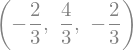

In [6]:
pappus_line.coefficients

In [7]:
line_b.equation().as_expr().subs(x, 5)

In [8]:
eq1 = sp.Eq(line_b.equation().expand(), 0)
# eq1 = sp.Expr(line_b.equation())
eq1 - sp.Expr(line_b.equation().as_expr())

TypeError: unsupported operand type(s) for -: 'Equality' and 'Expr'

In [ ]:
# eq2 = sp.Eq(-x + y - 1, 0)
eq1 = x - 5
eq2 = -x + y - 1
# eq2 = line_b.equation()
# eq2
sp.solve([eq1, eq2])

In [ ]:
l1 = line(A1, A2)
l1.equation()

In [ ]:
sp.solve([eq1, eq2], y)

In [ ]:
sp.solve(line_b.equation(), eq)

In [ ]:
line_b.intersection(sp.Line(sp.Eq(x + 0 * y - 5)))

In [ ]:
sp.Eq(x, 5)

In [ ]:
cpu_count()